In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Завантаження датасету
data = np.genfromtxt('IrisData_full.csv', delimiter=',', dtype=str)

X = data[:, :4].astype(float)
y_text = data[:, 4]

# Перетворення текстових міток у числові
unique_classes = np.unique(y_text)
class_mapping = {class_name: i for i, class_name in enumerate(unique_classes)}
y = np.array([class_mapping[label] for label in y_text])

print(f"Розмірність ознак: {X.shape}")
print(f"Розмірність міток: {y.shape}")
print(f"Назви класів: {list(unique_classes)}")
print(f"Відповідність: {class_mapping}")

Розмірність ознак: (150, 4)
Розмірність міток: (150,)
Назви класів: [np.str_('Iris-setosa'), np.str_('Iris-versicolor'), np.str_('Iris-virginica')]
Відповідність: {np.str_('Iris-setosa'): 0, np.str_('Iris-versicolor'): 1, np.str_('Iris-virginica'): 2}


In [2]:
# Перемішування записів
np.random.seed(18)
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

print(f"Дані перемішано")
print(f"Перші 5 міток після перемішування: {y[:5]}")

Дані перемішано
Перші 5 міток після перемішування: [1 1 1 0 0]


In [3]:
# Нормалізація параметрів
def normalize(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    std = np.where(std == 0, 1, std)
    return (X - mean) / std, mean, std

X_normalized, mean_X, std_X = normalize(X)

print(f"Нормалізація завершена")
print(f"До нормалізації:   середнє = {mean_X}, std = {std_X}")
print(f"Середнє після нормалізації: {X_normalized.mean(axis=0).round(4)}")
print(f"Стандартне відхилення після нормалізації: {X_normalized.std(axis=0).round(4)}")

Нормалізація завершена
До нормалізації:   середнє = [5.84333333 3.054      3.75866667 1.19866667], std = [0.82530129 0.43214658 1.75852918 0.76061262]
Середнє після нормалізації: [-0.  0.  0. -0.]
Стандартне відхилення після нормалізації: [1. 1. 1. 1.]


In [4]:
# Розділення на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Розділення завершено")
print(f"Навчальна вибірка: {X_train.shape[0]} зразків")
print(f"Тестова вибірка: {X_test.shape[0]} зразків")
print(f"Розподіл класів у навчальній вибірці: {np.bincount(y_train)}")
print(f"Розподіл класів у тестовій вибірці: {np.bincount(y_test)}")

Розділення завершено
Навчальна вибірка: 105 зразків
Тестова вибірка: 45 зразків
Розподіл класів у навчальній вибірці: [35 35 35]
Розподіл класів у тестовій вибірці: [15 15 15]


In [5]:
# Реалізація KNN-класифікатора
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predict_batch(X_train, y_train, X_test, k):
    predictions = []
    
    for test_point in X_test:
        distances = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train[k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        predictions.append(most_common)
    
    return np.array(predictions)

def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

print("KNN-класифікатор реалізовано")

KNN-класифікатор реалізовано


In [6]:
# Навчання з різними значеннями K
K_values = range(1, 21)
results = {}

print("Результати класифікації для різних K:")
print("-" * 50)
print(" K | Accuracy | Правильно/Всього")
print("-" * 50)

for k in K_values:
    y_pred = knn_predict_batch(X_train, y_train, X_test, k)
    accuracy = accuracy_score(y_test, y_pred)
    correct_predictions = np.sum(y_test == y_pred)
    total_predictions = len(y_test)
    results[k] = accuracy
    print(f"{k:2d} |   {accuracy:.3f}   |     {correct_predictions:2d}/{total_predictions:2d}")

# Вибір оптимального K
best_k = max(results, key=results.get)
best_accuracy = results[best_k]

print("-" * 50)
print(f"Навчання завершено для K від 1 до {max(K_values)}")

print(f"Найкраще значення K: {best_k}")
print(f"Найкраща точність: {best_accuracy:.3f}")

Результати класифікації для різних K:
--------------------------------------------------
 K | Accuracy | Правильно/Всього
--------------------------------------------------
 1 |   0.867   |     39/45
 2 |   0.867   |     39/45
 3 |   0.889   |     40/45
 4 |   0.889   |     40/45
 5 |   0.867   |     39/45
 6 |   0.867   |     39/45
 7 |   0.889   |     40/45
 8 |   0.889   |     40/45
 9 |   0.911   |     41/45
10 |   0.911   |     41/45
11 |   0.911   |     41/45
12 |   0.911   |     41/45
13 |   0.933   |     42/45
14 |   0.911   |     41/45
15 |   0.933   |     42/45
16 |   0.911   |     41/45
17 |   0.911   |     41/45
18 |   0.911   |     41/45
19 |   0.933   |     42/45
20 |   0.911   |     41/45
--------------------------------------------------
Навчання завершено для K від 1 до 20
Найкраще значення K: 13
Найкраща точність: 0.933


In [7]:
# Детальний аналіз для найкращого K
y_pred_best = knn_predict_batch(X_train, y_train, X_test, best_k)
cm = confusion_matrix(y_test, y_pred_best)

print(f"Матриця плутанини для K={best_k}:")
print(cm)

Матриця плутанини для K=13:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]


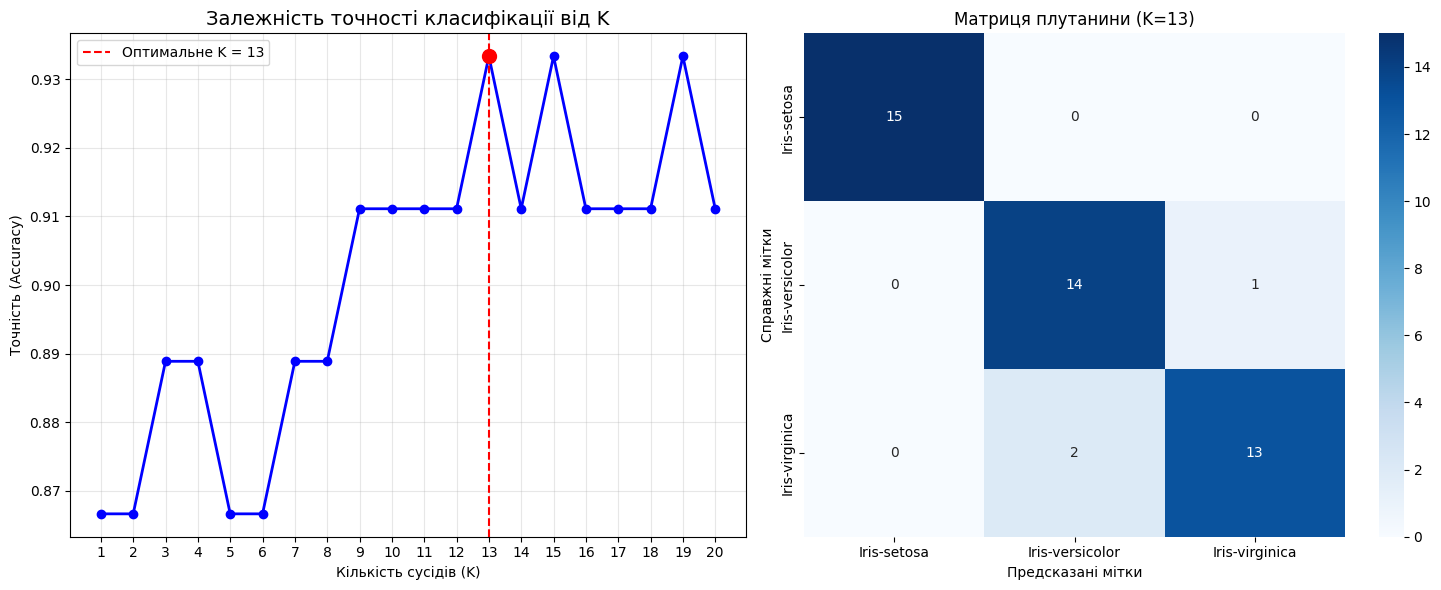

Аналіз результатів для K=13:
  Iris-setosa: 15/15 (1.000)
  Iris-versicolor: 14/15 (0.933)
  Iris-virginica: 13/15 (0.867)


In [8]:
# Візуалізація результатів
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Графік залежності точності від K
k_list = list(results.keys())
accuracy_list = list(results.values())

ax1.plot(k_list, accuracy_list, marker='o', linestyle='-', color='blue', linewidth=2)
ax1.axvline(x=best_k, color='red', linestyle='--', label=f'Оптимальне K = {best_k}')
ax1.scatter(best_k, best_accuracy, color='red', s=100, zorder=5)

ax1.set_title('Залежність точності класифікації від K', fontsize=14)
ax1.set_xlabel('Кількість сусідів (K)')
ax1.set_ylabel('Точність (Accuracy)')
ax1.set_xticks(k_list)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Матриця плутанини
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=unique_classes,
            yticklabels=unique_classes,
            ax=ax2)
ax2.set_title(f'Матриця плутанини (K={best_k})')
ax2.set_xlabel('Предсказані мітки')
ax2.set_ylabel('Справжні мітки')

plt.tight_layout()
plt.show()

print(f"Аналіз результатів для K={best_k}:")
for i, class_name in enumerate(unique_classes):
    correct = cm[i, i]
    total = np.sum(cm[i, :])
    accuracy_class = correct / total if total > 0 else 0
    print(f"  {class_name}: {correct}/{total} ({accuracy_class:.3f})")